# Comparison of protein expressions in MATseq samples

### 18-03-2024

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

In [2]:
# Set the displya size of pd DataFrames
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 200)
pd.set_option("display.precision", 5)
pd.set_option("display.max_seq_items", 50)
pd.set_option("display.max_seq_items", 50)
pd.set_option("display.precision", 2)

# Set the style of the seaborn plots
sns.set_style("white")

In [4]:
path_protein = "/home/t.afanasyeva/MAT_rnaseq/resources/240319_il6_readouts.csv"
il6_protein = pd.read_csv(path_protein, sep=";", index_col="sample_name")
il6_protein = il6_protein.drop(columns=["Unnamed: 0", "sample_id"])
il6_protein = il6_protein[~il6_protein.index.duplicated(keep="last")]
il6_protein = il6_protein.clip(lower=0)

In [5]:
path_gene = (
    "/home/t.afanasyeva/MAT_rnaseq/gene_counts/240224_complete_dataset_274_samples.csv"
)
gene_counts = pd.read_csv(path_gene, index_col=0)
gene_counts = gene_counts.apply(
    lambda x: (x / (np.sum(x) if np.sum(x) != 0 else 1)) * 1000000, axis=1
)
gene_counts = gene_counts.round()

In [6]:
gene_counts.shape

(274, 47698)

In [7]:
il6_gene = gene_counts["IL6"]
il6 = il6_protein.merge(il6_gene, left_index=True, right_index=True)

In [8]:
il6.shape

(274, 3)

In [9]:
classes = []
batches = []
experiment = []

for sample in il6.index:
    classes.append(sample.split("_")[2])
    batches.append(sample.split("_")[1])
    experiment.append(sample.split("_")[0])

il6["classes"] = classes
il6["batches"] = batches
il6["experiment"] = experiment

In [11]:
df = il6

mask = (
    (df.classes != "FSL-1")
    & (df.classes != "Fla-ST")
    & (df.classes != "Mur")
    & (df.classes != "LPS-SM")
    & (df.classes != "Pam2")
    & (df.classes != "SCG")
    & (df.classes != "SCG-low")
    & (df.classes != "CL8")
    & (df.classes != "Fab")
    & (df.classes != "MPLA")
    & (df.classes != "TL8")
)
il6 = df[mask]
del df

In [12]:
il6.shape

(221, 6)

In [ ]:
list(il6.index)

Combine gene expression and protein expression and do zscore per class to plot them at the same scale

In [96]:
il6["classes"] = il6["classes"].replace(
    {
        "R848-low": "R848",
        "R848": "R848",
        "HKEB": "heat-killed bacteria",
        "HKSA": "heat-killed bacteria",
        "Pam3-R848": "synergy",
        "Pam3-PGN": "synergy",
        "LPS-PGN": "synergy",
        "cleared": "nanogam",
        "clean": "nanogam",
        "contaminated": "nanogam",
        "cAlb": "albumin",
        "Alb": "albumin",
    }
)

In [ ]:
path_out = (
    "/home/t.afanasyeva/output_MATseq/240313_il6_protein/scatter_per_class_zscore"
)
grouped_il6 = il6.groupby("classes")

for myclass, group in grouped_il6:
    group = stats.zscore(
        group.select_dtypes(include="number"), axis=0, ddof=1, nan_policy="omit"
    )
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=group)
    plt.title(f"Scatter plot for class: {myclass}")
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
    plt.xlabel("class")
    plt.ylabel("IL6")
    plt.tight_layout()
    plt.savefig(os.path.join(path_out, f"scatter_{myclass}.png"))
    plt.show()
    plt.close()

Protein expression with no gene counts, so removed z score

In [158]:
path_protein = (
    "/home/t.afanasyeva/MAT_rnaseq/notebooks/resources/240319_il6_readouts.csv"
)
il6_protein = pd.read_csv(path_protein, sep=";", index_col="sample_name")
il6_protein = il6_protein.drop(columns=["Unnamed: 0", "sample_id"])
il6_protein = il6_protein[~il6_protein.index.duplicated(keep="last")]
il6_protein = il6_protein.clip(lower=0)

In [159]:
classes = []
batches = []
experiment = []

for sample in il6_protein.index:
    classes.append(sample.split("_")[2])
    batches.append(sample.split("_")[1])
    experiment.append(sample.split("_")[0])

il6_protein["classes"] = classes
il6_protein["batches"] = batches
il6_protein["experiment"] = experiment

In [160]:
df = il6_protein
mask = (
    (df.classes != "FSL-1")
    & (df.classes != "Fla-ST")
    & (df.classes != "Mur")
    & (df.classes != "LPS-SM")
    & (df.classes != "Pam2")
    & (df.classes != "SCG")
    & (df.classes != "SCG-low")
    & (df.classes != "CL8")
    & (df.classes != "Fab")
    & (df.classes != "MPLA")
    & (df.classes != "TL8")
    & (df.classes != "LTA-BS")
    & (df.classes != "LTA")
)
il6_protein = df[mask]
del df

In [157]:
# il6_protein["classes"] = il6_protein["classes"].replace(
#     {
#         "R848-low": "R848",
#         "R848": "R848",
#         "HKEB": "heat-killed bacteria",
#         "HKSA": "heat-killed bacteria",
#         "Pam3-R848": "synergy",
#         "Pam3-PGN": "synergy",
#         "LPS-PGN": "synergy",
#         "cleared": "nanogam",
#         "clean": "nanogam",
#         "contaminated": "nanogam",
#         "cAlb": "albumin",
#         "Alb": "albumin",
#     }
# )

Make violin plots

In [164]:
path_out = (
    "/home/t.afanasyeva/output_MATseq/240313_il6_protein/protein_violin_per_class"
)
if not os.path.exists(path_out):
    os.mkdir(path_out)

In [177]:
comp_list = ["IL6_protein_expression_3,5hours", "IL6_protein_expression_20hours", "IL6"]

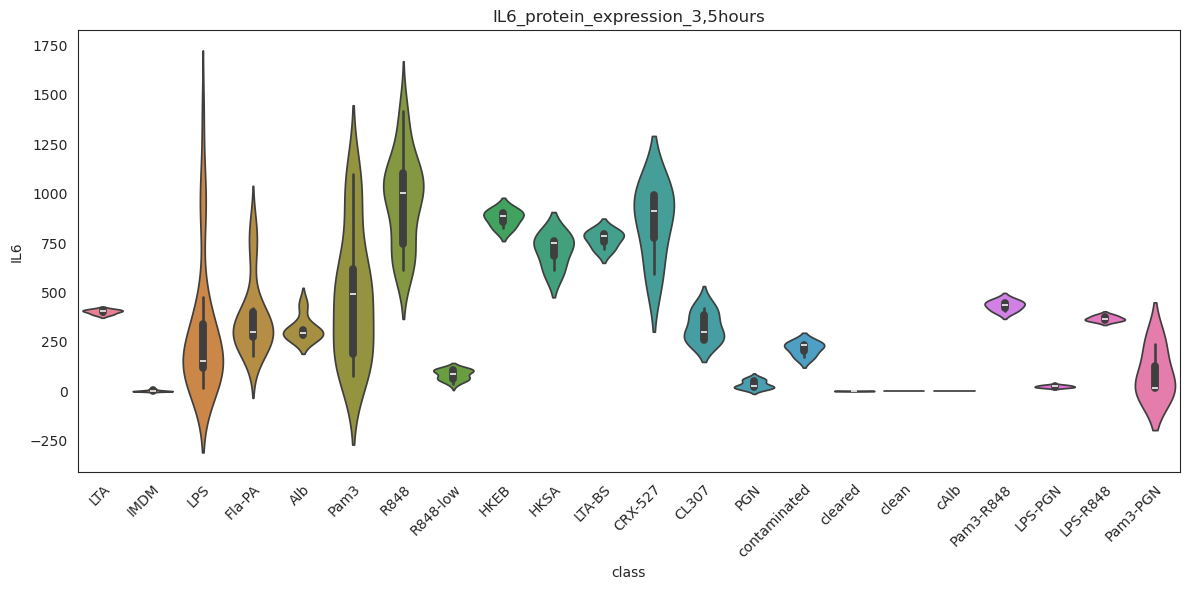

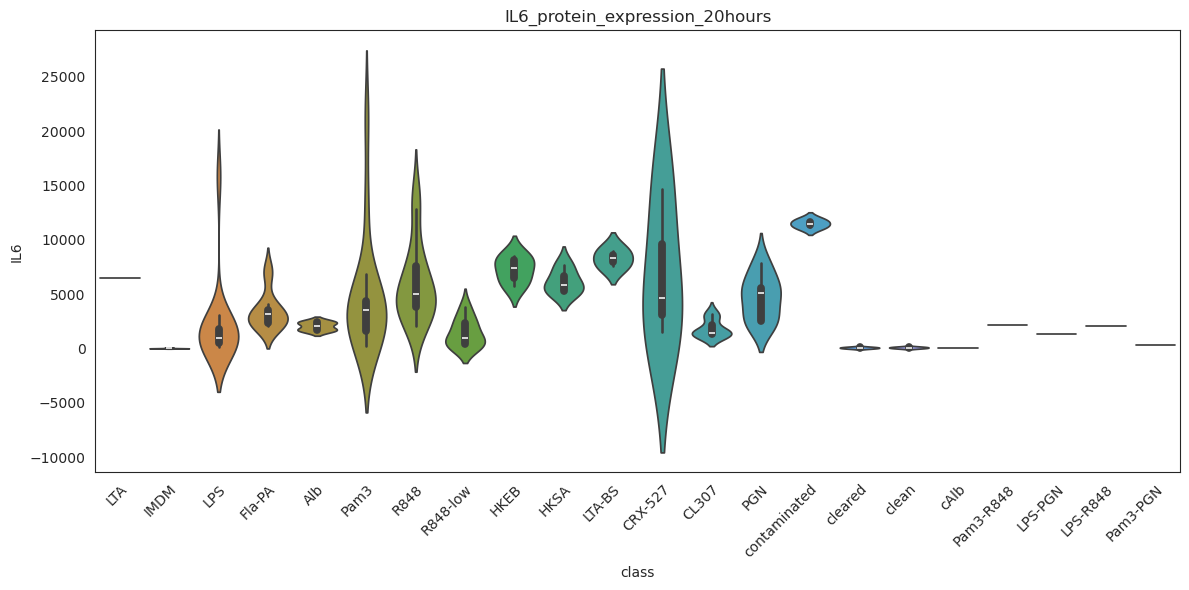

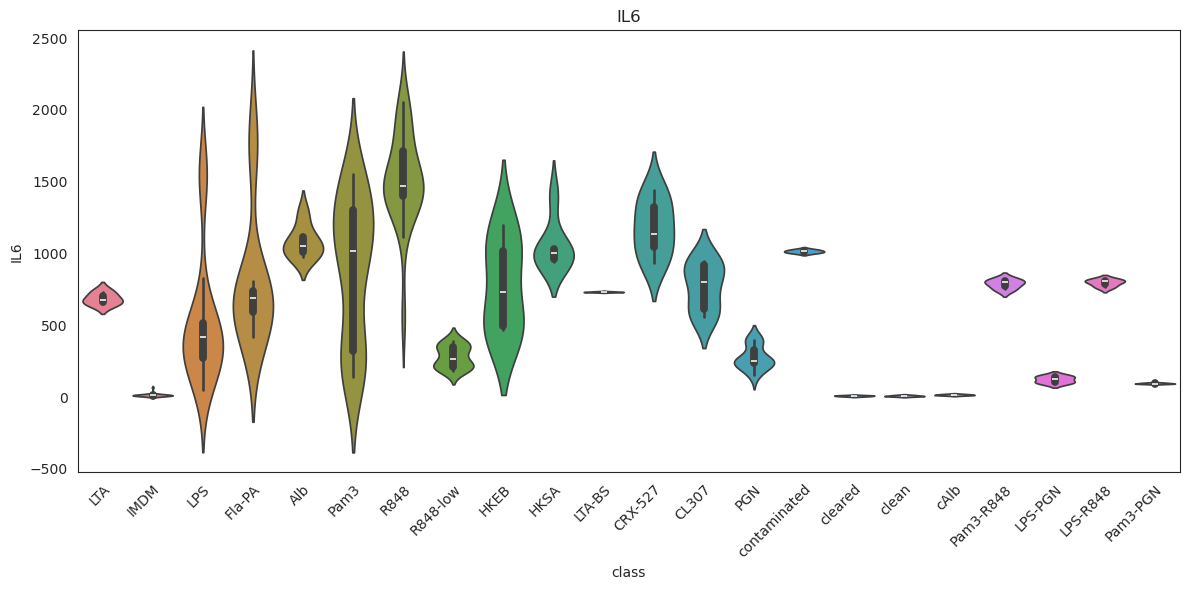

In [182]:
for comp in comp_list:
    plt.figure(figsize=(12, 6))
    sns.violinplot(
        data=il6,
        y=comp,
        x="classes",
        hue="classes",
    )

    plt.title(f"{comp}")
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
    plt.xlabel("class")
    plt.ylabel("IL6")
    plt.tight_layout()
    plt.savefig(os.path.join(path_out, f"violine_{comp}.png"))
    plt.show()
    plt.close()

In [ ]:
il6_protein.loc[il6_protein["classes"] == "CRX-527"]

,"IL6_protein_expression_3,5hours",IL6_protein_expression_20hours,classes,batches,experiment
sample_name,,,,,
BA063_7128_CRX-527_25,988.0,NaN,CRX-527,7128,BA063
BA063_7128_CRX-527_26,837.0,NaN,CRX-527,7128,BA063
BA063_7128_CRX-527_27,1002.0,NaN,CRX-527,7128,BA063
BA046_7128_CRX-527_9,591.0,4628.0,CRX-527,7128,BA046
MD251_7128_CRX-527_22,NaN,1500.0,CRX-527,7128,MD251
MD251_7128_CRX-527_23,NaN,14700.0,CRX-527,7128,MD251
MD251_7128_CRX-527_24,NaN,NaN,CRX-527,7128,MD251
BA046_7128_CRX-527_10,509.0,4628.0,CRX-527,7128,BA046
BA046_7128_CRX-527_11,476.0,4628.0,CRX-527,7128,BA046


Protein and gene expression in classes that exist in all batches

In [28]:
il6

,"IL6_protein_expression_3,5hours",IL6_protein_expression_20hours,IL6,classes,batches,experiment
BA029_7128_LTA_18,410.0,6522.0,649.0,LTA,7128,BA029
BA029_7128_LTA_19,390.0,6522.0,675.0,LTA,7128,BA029
BA029_7128_LTA_20,408.0,6522.0,733.0,LTA,7128,BA029
BA042_7128_IMDM_1,4.0,68.0,12.0,IMDM,7128,BA042
BA042_7128_IMDM_2,12.0,68.0,19.0,IMDM,7128,BA042
...,...,...,...,...,...,...
BA060_7128_Pam3-PGN_5,13.0,345.0,100.0,Pam3-PGN,7128,BA060
BA060_7128_Pam3-PGN_6,241.0,345.0,93.0,Pam3-PGN,7128,BA060
BA060_7128_Pam3-PGN_7,18.0,345.0,95.0,Pam3-PGN,7128,BA060
BA059_7128_R848_11,616.0,2030.0,1469.0,R848,7128,BA059


In [54]:
classes_acrros_batches = set(il6.loc[il6["batches"] != "7128"]["classes"])
mask = il6["classes"].isin(classes_acrros_batches)
il6 = il6[mask]

In [55]:
il6.shape

(146, 6)

In [40]:
path_out = "/home/t.afanasyeva/output_MATseq/240313_il6_protein/batch_comparison"

if not os.path.exists(path_out):
    os.mkdir(path_out)

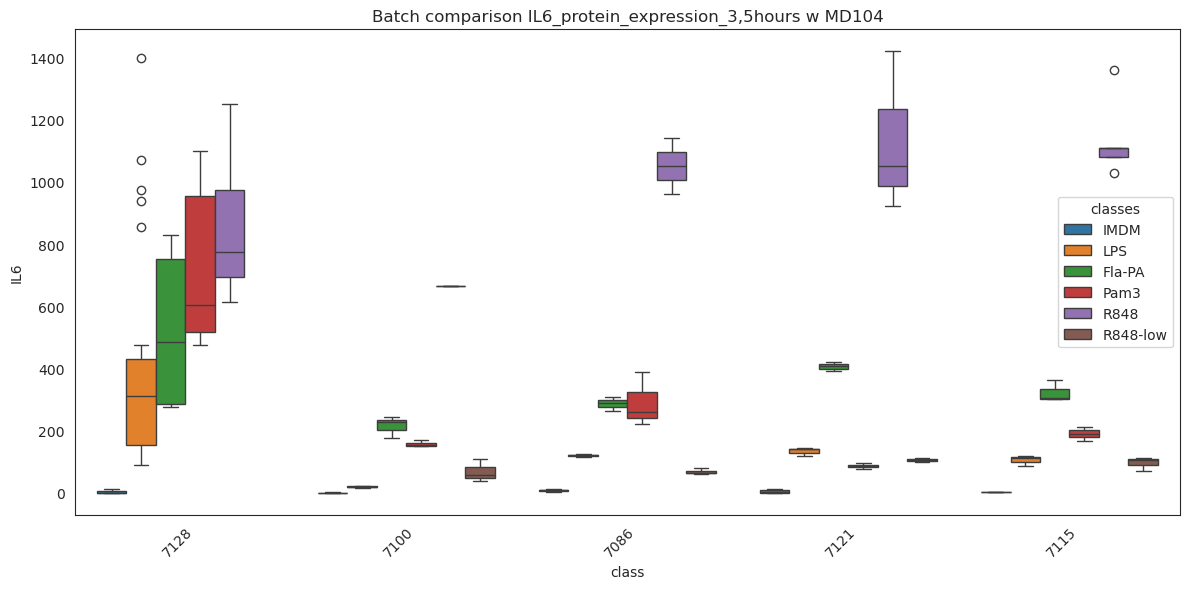

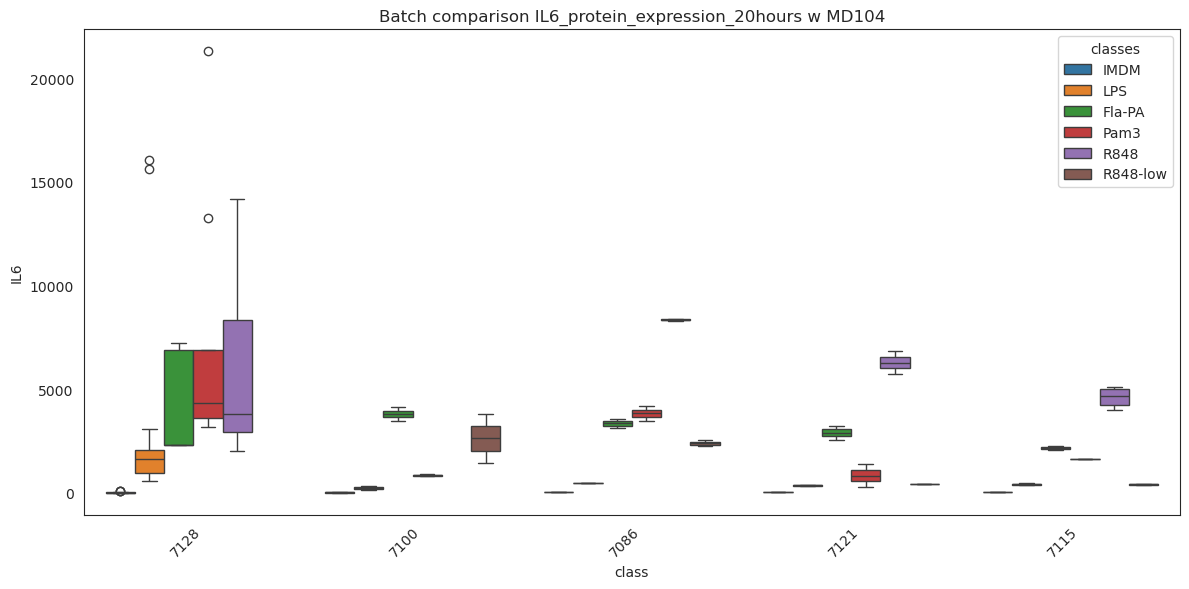

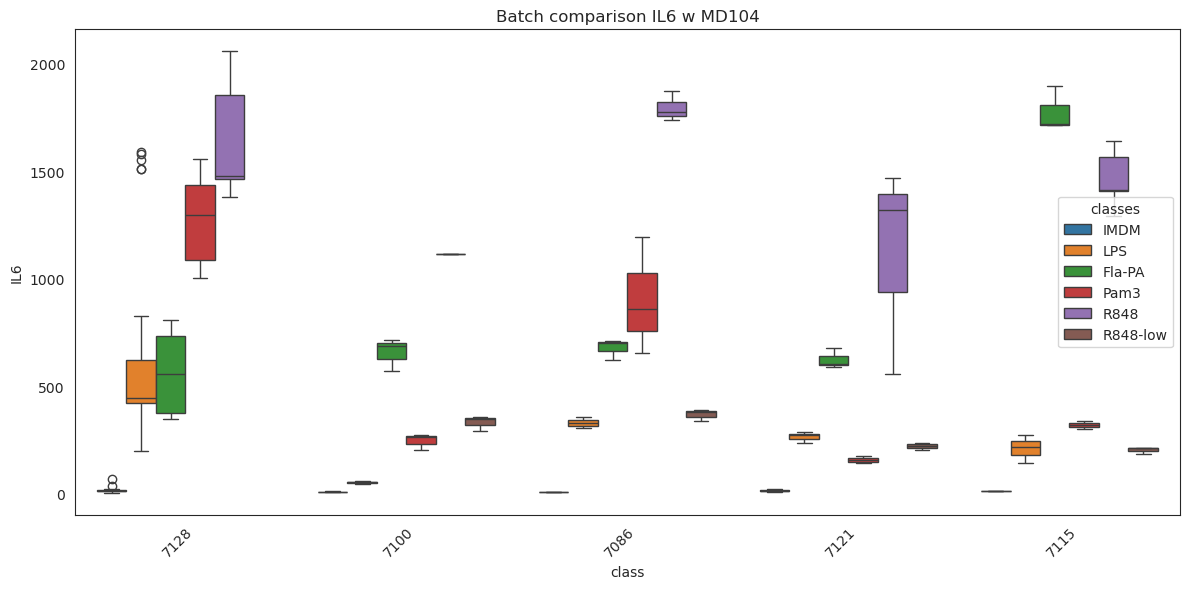

In [57]:
for comp in comp_list:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=il6,
        y=comp,
        x="batches",
        hue="classes",
    )
    plt.title(f"Batch comparison {comp} w MD104")
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
    plt.xlabel("class")
    plt.ylabel("IL6")
    plt.tight_layout()
    plt.savefig(os.path.join(path_out, f"Batch comparison {comp} w MD104.png"))
    plt.show()
    plt.close()

In [58]:
experiment_to_exclude = ["MD104"]
mask = ~il6["experiment"].isin(experiment_to_exclude)
il6 = il6[mask]

In [ ]:
for comp in comp_list:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=il6,
        y=comp,
        x="batches",
        hue="classes",
    )
    plt.title(f"Batch comparison {comp} w/o MD104")
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
    plt.xlabel("class")
    plt.ylabel("IL6")
    plt.tight_layout()
    plt.savefig(os.path.join(path_out, f"Batch comparison {comp}.png"))
    plt.show()
    plt.close()

ANOVA with age/sex

In [60]:
path_gene = "/home/t.afanasyeva/MAT_rnaseq/notebooks/resources/Sex age distribution in MAT batches.csv"
sex_age = pd.read_csv(path_gene, sep=",")
sex_age["batches"] = sex_age["batches"].astype(str)
il6_anova = sex_age.merge(il6, on="batches")

In [61]:
il6_anova.head()

,batches,sex,age,"IL6_protein_expression_3,5hours",IL6_protein_expression_20hours,IL6,classes,experiment
0,7121,0.0,38,1.0,8.0,21.0,IMDM,MD214
1,7121,0.0,38,0.0,19.0,14.0,IMDM,MD214
2,7121,0.0,38,13.0,NaN,10.0,IMDM,MD214
3,7121,0.0,38,140.0,358.0,271.0,LPS,MD214
4,7121,0.0,38,118.0,338.0,238.0,LPS,MD214


In [35]:
corr = il6_anova.corr(method="pearson", min_periods=1, numeric_only=True)
corr.style.background_gradient(cmap="coolwarm", axis=None)

,sex,age,"IL6_protein_expression_3,5hours",IL6_protein_expression_20hours,IL6
sex,1.000000,0.576499,-0.056519,0.031744,0.027832
age,0.576499,1.000000,-0.047988,0.020851,-0.005169
"IL6_protein_expression_3,5hours",-0.056519,-0.047988,1.000000,0.712813,0.746102
IL6_protein_expression_20hours,0.031744,0.020851,0.712813,1.000000,0.566697
IL6,0.027832,-0.005169,0.746102,0.566697,1.000000


In [36]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(
    corr.style.background_gradient(cmap="coolwarm", axis=None, vmin=-1, vmax=1)
    .highlight_null(color="#f1f1f1")  # Color NaNs grey
    .format(precision=2)
)

,sex,age,"IL6_protein_expression_3,5hours",IL6_protein_expression_20hours,IL6
sex,nan,nan,nan,nan,nan
age,0.58,nan,nan,nan,nan
"IL6_protein_expression_3,5hours",-0.06,-0.05,nan,nan,nan
IL6_protein_expression_20hours,0.03,0.02,0.71,nan,nan
IL6,0.03,-0.01,0.75,0.57,nan


In [65]:
from scipy.stats import f_oneway

In [41]:
il6_anova.head()
# il6_anova.describe()

,batches,sex,age,"IL6_protein_expression_3,5hours",IL6_protein_expression_20hours,IL6,classes,experiment
0,7121,0.0,38,1.0,8.0,21.0,IMDM,MD214
1,7121,0.0,38,0.0,19.0,14.0,IMDM,MD214
2,7121,0.0,38,13.0,NaN,10.0,IMDM,MD214
3,7121,0.0,38,140.0,358.0,271.0,LPS,MD214
4,7121,0.0,38,118.0,338.0,238.0,LPS,MD214


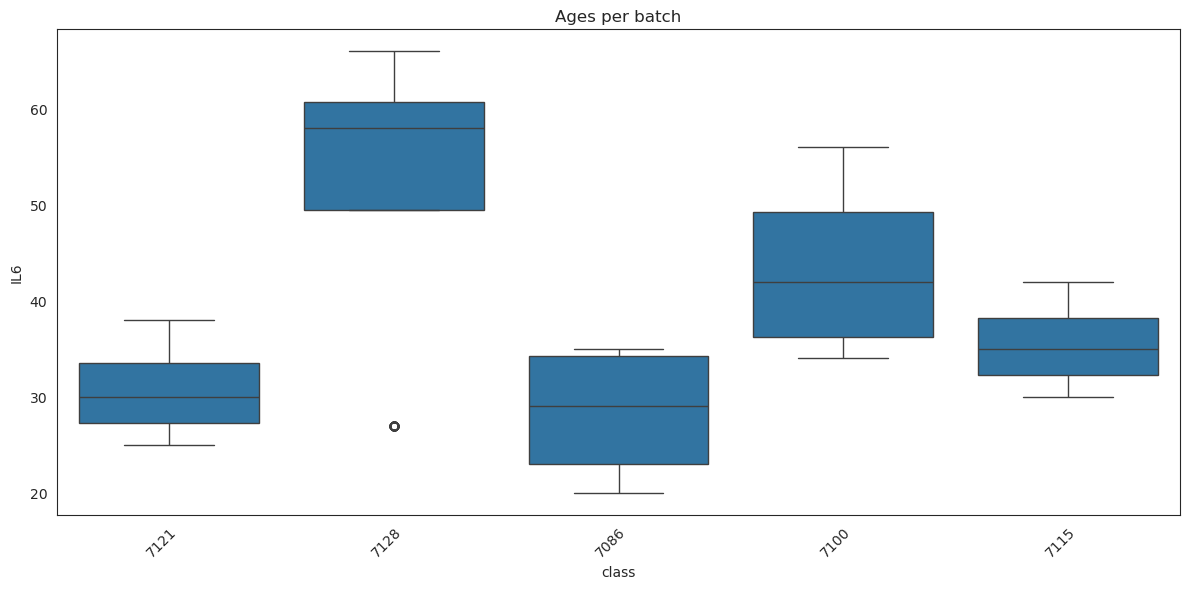

In [181]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=il6_anova,
    y="age",
    x="batches",
)
plt.title("Ages per batch")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("class")
plt.ylabel("IL6")
plt.tight_layout()
# plt.savefig(os.path.join(path_out, "ages per batch.png"))
plt.show()
plt.close()

In [71]:
for name, group in il6_anova.groupby("classes"):
    print(name)

Fla-PA
IMDM
LPS
Pam3
R848
R848-low


Counts distributions

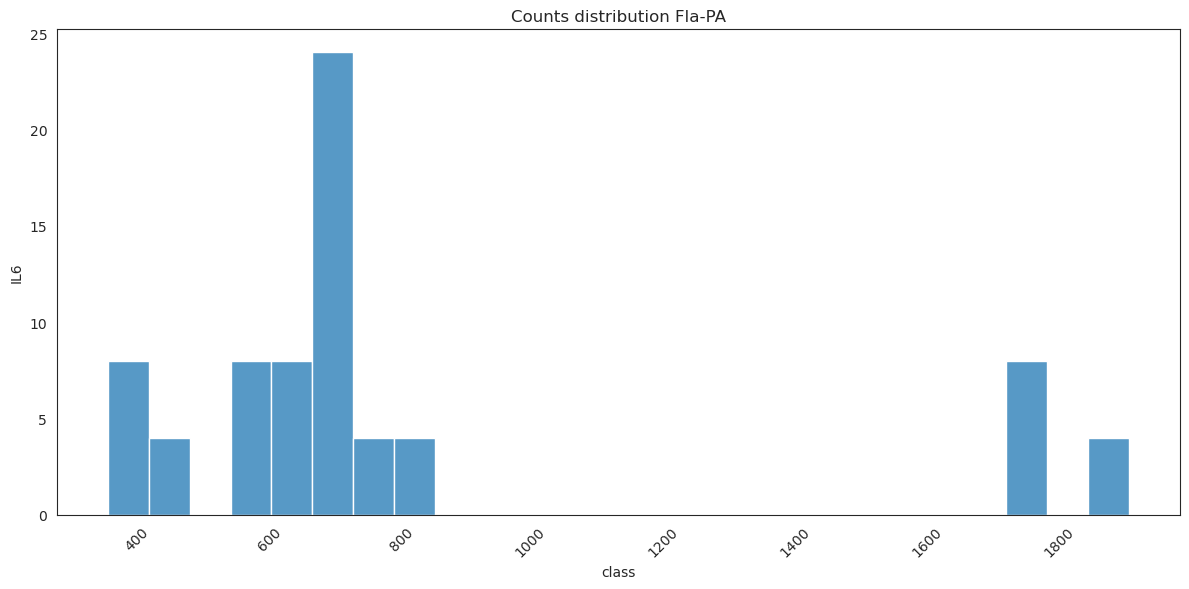

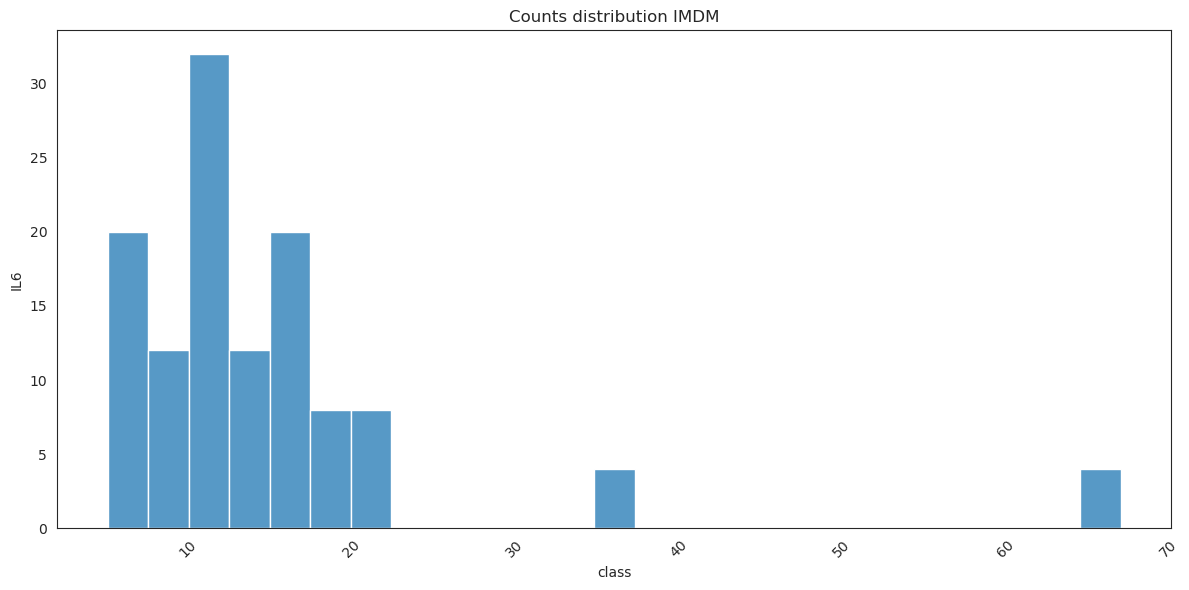

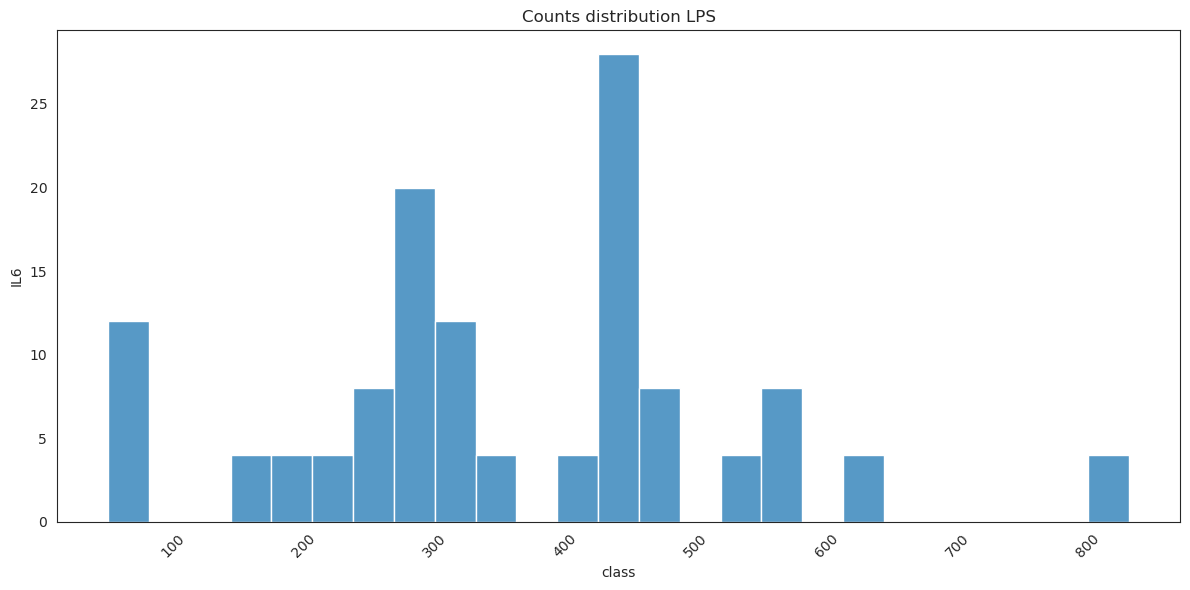

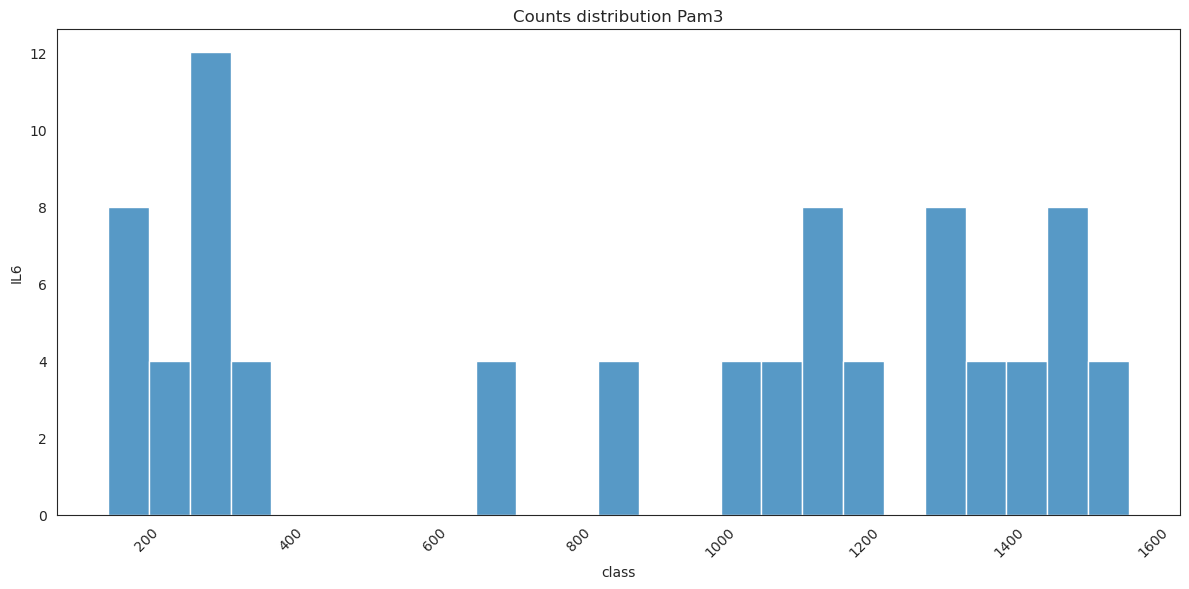

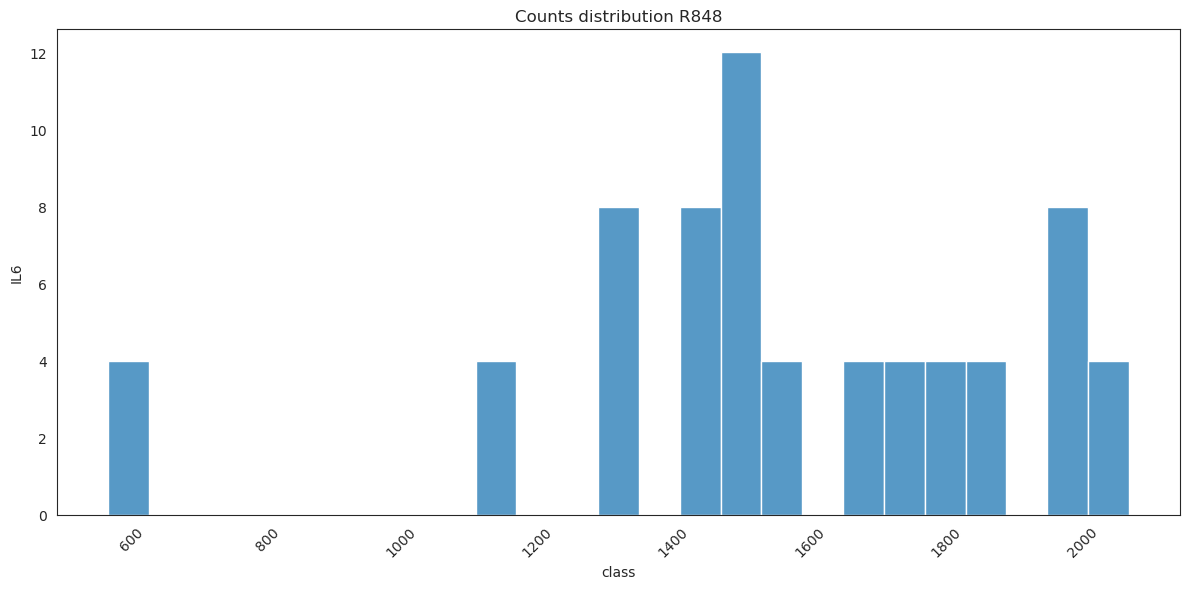

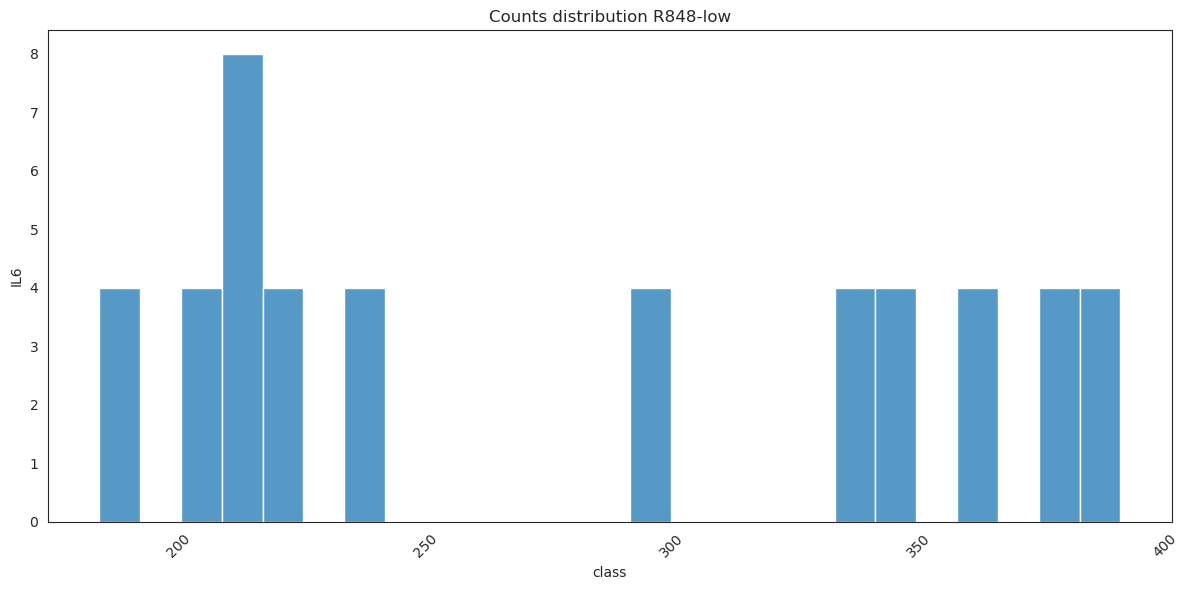

In [87]:
path_out = "/home/t.afanasyeva/output_MATseq/240313_il6_protein/counts_distributions"
if not os.path.exists(path_out):
    os.mkdir(path_out)

for name, group in il6_anova.groupby("classes"):

    plt.figure(figsize=(12, 6))
    sns.histplot(data=group["IL6"], bins=25)
    plt.title(f"Counts distribution {name}")
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
    plt.xlabel("class")
    plt.ylabel("IL6")
    plt.tight_layout()
    plt.savefig(os.path.join(path_out, "Counts distribution {name}.png"))
    plt.show()
    plt.close()

    # samples = [condition[1] for condition in name_group[1].groupby("batches")["IL6"]]
    # if len(samples) > 1:
    #     f_val, p_val = stats.f_oneway(*samples)
    #     print(
    #         f"Name: {name_group[0]}, F value: {f_val:.2f}, p value: {p_val}"
    # )

In [122]:
f_val_list = []
p_val_list = []
names_list = []
for name, group in il6_anova.groupby("classes"):
    samples = [group[1] for group in group.groupby("batches")["IL6"]]
    if len(samples) > 1:
        f_val, p_val = stats.f_oneway(*samples)
        print(f"Class: {name}, F value: {f_val:.2f}, p value: {p_val}")
        f_val_list.append(f_val)
        p_val_list.append(p_val)
        names_list.append(name)

anova_stats = pd.DataFrame(
    {
        "class": names_list,
        "f_value": f_val_list,
        "p_value": p_val_list,
    }
)
anova_stats
# anova_stats["class"]=names_list
# anova_stats["f_value"]=f_val_list
# anova_stats["p_value"]=p_val_list

Class: Fla-PA, F value: 219.01, p value: 1.0801233698799337e-37
Class: IMDM, F value: 2.83, p value: 0.02761915472136287
Class: LPS, F value: 40.17, p value: 1.7153442588128868e-21
Class: Pam3, F value: 187.04, p value: 1.891847851619323e-39
Class: R848, F value: 21.89, p value: 2.337282159928971e-11
Class: R848-low, F value: 174.29, p value: 1.96606106832429e-24


,class,f_value,p_value
0,Fla-PA,219.01,1.08e-37
1,IMDM,2.83,2.76e-02
2,LPS,40.17,1.72e-21
3,Pam3,187.04,1.89e-39
4,R848,21.89,2.34e-11
5,R848-low,174.29,1.97e-24


In [69]:
f_oneway(*[s for idx, s in il6_anova.groupby("sex").IL6]), f_oneway(
    *[s for idx, s in il6_anova.groupby("batches").IL6]
)

(F_onewayResult(statistic=0.014698221539579238, pvalue=0.9854096817846528),
 F_onewayResult(statistic=9.282223006227982, pvalue=3.004493372019485e-07))

Make violin plots

In [ ]:
path_out = (
    "/home/t.afanasyeva/output_MATseq/240313_il6_protein/protein_violin_per_class"
)
if not os.path.exists(path_out):
    os.mkdir(path_out)

In [ ]:
list(il6.index)

In [ ]:
path_out = (
    "/home/t.afanasyeva/output_MATseq/240313_il6_protein/protein_violin_per_class"
)
if not os.path.exists(path_out):
    os.mkdir(path_out)